### Visualizations 

from [00 Exploration](00_Exploration.ipynb):
>__Conflict__
I already expect to pay  1or 1.25 per avocado in California. I already expect to pay a little more for organic.

>__Timeliness__
When are avocadoes cheaper? Not overall but if I already expected to pay 1.25 or 2 dollars for an organic avocado, when is that same avocado cheaper by comparison to what I was already willing to pay (aka the average avocado price)?
Organic avocadoes are more expensive but they always seem to follow the same price trend as conventional avocadoes, is there a time where these two converge? Is there a time when, for example, an organic avocado is cheaper (by comparison to organic avocado prices) than a conventional avocado is (by comparison to other conventional avocadoes)? In other words, is there a time when there is a deal on one type of avocado but not the other?

>__Resolution__
[wait for data viz]

In [1]:
import altair as alt
import pandas as pd

In [2]:
df = pd.read_csv("../data/processed/working-CA_pct_changes.csv")

df.head()

,Date,Year,Type,Region,percent_change,SeasonallyAdjusted_AveragePrice,AveragePrice,Total Volume,Small Hass,Large Hass,XL Hass,Small Bags,Large Bags,XLarge Bags,Total Bags
0,2015-12-27,2015,conventional,California,0.835627,0.90,0.90,5040365.47,1833946.59,1760956.02,232755.85,1090140.07,110737.35,11829.59,1212707.01
1,2015-12-20,2015,conventional,California,0.872766,0.94,0.94,4695737.21,1676601.43,1543280.76,266689.82,1061703.58,136747.10,10714.52,1209165.20
2,2015-12-13,2015,conventional,California,0.807772,0.87,0.87,5259354.30,1806690.08,1627240.76,232985.13,1404012.00,180150.37,8275.96,1592438.33
3,2015-12-06,2015,conventional,California,0.724210,0.78,0.78,5775536.27,1943065.50,2100246.17,221957.26,1376640.91,126664.37,6962.06,1510267.34
4,2015-12-27,2015,organic,California,0.892104,1.46,1.45,98576.63,14306.68,50893.97,0.00,29507.45,3868.53,0.00,33375.98


In [3]:
data = df
data['percent_change'] = data['percent_change'] - 1

In [43]:
%run theme.py

In [37]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Ubuntu|Ubuntu+Condensed|Ubuntu+Mono');
</style>

In [38]:
pos_neg_color = alt.condition("datum.percent_change < 0", alt.value("#b44b27"), alt.value("#004a80"))

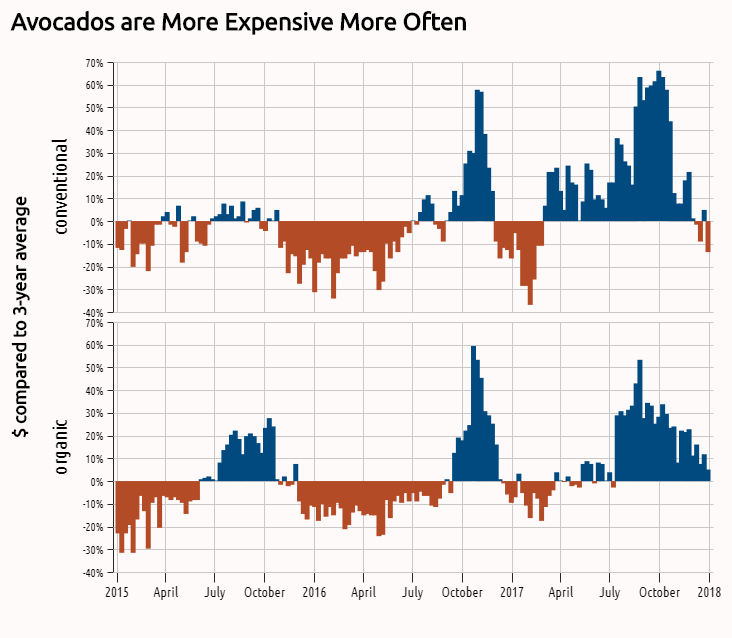

In [140]:
chart = alt.Chart(df).mark_bar().encode(
    x = alt.X("Date:T", title = " "),
    y = alt.Y("percent_change:Q", axis = alt.Axis(format = "%", title = "")),
    color = pos_neg_color,
    row = alt.Row("Type:N", header = alt.Header( title = "$ compared to 3-year average"))
).properties(
    title = 'Avocados are More Expensive More Often',
    width = 600,
    height = 250
)
chart = chart.configure_axisLeft(labelFontSize=12)

chart

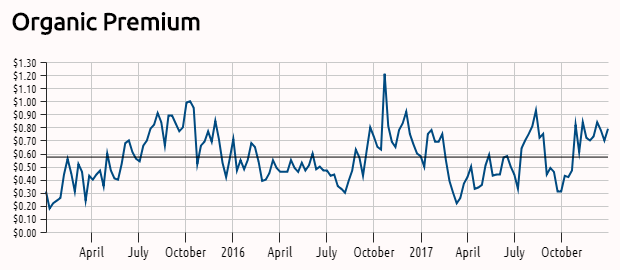

In [141]:
data = df.pivot_table(index = 'Date', columns='Type', values='SeasonallyAdjusted_AveragePrice')

data['diff'] = data['organic'] - data['conventional']

data = data.reset_index()[['Date','diff']]

chart2 = alt.Chart(data).mark_line(size = 3).encode(
    x = alt.X("Date:T", title = ""),
    y = alt.Y("diff:Q", axis = alt.Axis(title = "", format = '$.2f')),
    color = pos_neg_color,
).properties(
    title = 'Organic Premium',
    width = 600,
    height = 250,
)
chart2# = chart2.configure_axisLeft(labelFontSize=12)

rule = alt.Chart(data).mark_rule().encode(
    alt.Y('average(diff)'),
    size=alt.value(1)
)


chart2 = chart2 + rule
chart2.configure_axisLeft(labelFontSize=12)